# <center><h1 style="font-family: Times New Roman; color: black;">Data Preprocessing and Feature Engineering in Machine Learning</h1></center>

# Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

# Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

# Tasks:
# 1. Data Exploration and Preprocessing:
1. Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
2. Handle missing values as per the best practices (imputation, removal, etc.).
3. Apply scaling techniques to numerical features:
4. Standard Scaling
5. Min-Max Scaling
6. Discuss the scenarios where each scaling technique is preferred and why.

# 2. Encoding Techniques:

1. Apply One-Hot Encoding to categorical variables with less than 5 categories.
2. Use Label Encoding for categorical variables with more than 5 categories.
3. Discuss the pros and cons of One-Hot Encoding and Label Encoding.

# 3. Feature Engineering:
1. Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
2. Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

# 4. Feature Selection:
1. Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
2. Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

# Solutions:

# 1. Data Exploration and Preprocessing:

# 1.1 Load the dataset and conduct basic data exploration:

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load dataset
data = pd.read_csv('adult_with_headers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Display summary statistics for numerical columns
data.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

# 1.2 Handling Missing Values

In [4]:
# Check for missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# 1.3 Apply scaling techniques to numerical features:

In [5]:
# Selecting numerical features for scaling
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Standard Scaling

In [6]:
scaler_standard = StandardScaler()
standard_scaled_data = scaler_standard.fit_transform(data[numerical_features])

# Creating DataFrame for Standard Scaled Data
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_features)
standard_scaled_df.head()

age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429

Min-Max Scaling

In [7]:
scaler_minmax = MinMaxScaler()
minmax_scaled_data = scaler_minmax.fit_transform(data[numerical_features])

# Creating DataFrame for Min-Max Scaled Data
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=numerical_features)
minmax_scaled_df.head()

age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959

# 1.4 Explanation of scaling techniques

1. Standard Scaling (Z-score normalization): It transforms the data to have a mean of 0 and a standard deviation of 1. 
   This method is preferred when:
  - The features have different units or ranges.
  - You expect the model (e.g., linear regression, SVM) to assume normally distributed data.


2. Min-Max Scaling: It scales the data between a fixed range, typically [0, 1]. 
   This method is preferred when:
  - The data doesn't follow a Gaussian distribution.
  - The model used does not assume normally distributed data (e.g., neural networks, KNN).

# 2. Encoding Techniques:

# 2.1 One-Hot Encoding for categorical variables with less than 5 categories

In [12]:
# Identifying categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Identifying columns with fewer than 5 unique values
one_hot_columns = [col for col in categorical_columns if data[col].nunique() < 5]

# Check if one_hot_columns is defined correctly
print(one_hot_columns)  # This should print the list of columns that will be one-hot encoded

['sex', 'income']


In [13]:
# Applying One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use 'sparse_output' instead of 'sparse'
one_hot_encoded_data = one_hot_encoder.fit_transform(data[one_hot_columns])

# Convert the result into a DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

# Display the first few rows of the One-Hot Encoded Data
one_hot_encoded_df.head()

sex_ Male  income_ >50K
0        1.0           0.0
1        1.0           0.0
2        1.0           0.0
3        1.0           0.0
4        0.0           0.0

# 2.2 Use Label Encoding for categorical variables with more than 5 categories.

In [14]:
# Importing necessary library for Label Encoding
from sklearn.preprocessing import LabelEncoder

# Identifying categorical variables with more than 5 unique values
label_encoding_columns = [col for col in categorical_columns if data[col].nunique() >= 5]

# Applying Label Encoding to each identified column
label_encoder = LabelEncoder()
for col in label_encoding_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the first few rows of the Label Encoded columns
data[label_encoding_columns].head()

workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  
0              39  
1              39  
2              39  
3              39  
4               5

# 2.3 Pros and Cons of One-Hot Encoding and Label Encoding

1. One-Hot Encoding
Definition: One-Hot Encoding creates binary columns for each category of a categorical feature. For each observation, one binary column is set to 1, while the rest are set to 0.

Pros:

No Assumed Ordinal Relationship: One-Hot Encoding doesn't assume any order between categories, making it ideal for categorical (nominal) features that don’t have a natural order (e.g., colors, product types).

Compatibility with Most Models: Many machine learning models, including linear regression, logistic regression, and neural networks, work well with one-hot encoded data, as it prevents the model from assuming a relationship between categories that don't exist.

Prevents Misinterpretation: The use of binary columns ensures that no category is implicitly treated as larger or smaller, which can happen with Label Encoding.

Cons:

Increases Dimensionality: One-Hot Encoding can lead to a significant increase in the number of features, especially if the categorical variable has many categories. This can cause issues with computational efficiency and memory usage, particularly for large datasets.

Sparsity in Data: Since only one column per observation has a value of 1 and the rest are 0, this can lead to sparse data, which may affect the performance of some models.

Multicollinearity: Without proper handling, One-Hot Encoding can introduce multicollinearity when features are highly correlated. This can be mitigated by dropping one of the categories using the drop='first' option.


2. Label Encoding
Definition: Label Encoding assigns a unique integer to each category in a categorical feature. For example, if a feature has three categories ["red", "green", "blue"], they may be encoded as [0, 1, 2].

Pros:

Memory Efficient: Label Encoding does not increase the number of features, which keeps the dimensionality low. This is particularly beneficial when working with high-dimensional datasets.

Faster to Implement: Since it simply replaces each category with an integer, Label Encoding is faster to implement compared to One-Hot Encoding, especially in large datasets.

Useful for Ordinal Data: Label Encoding works well when the categories are ordinal (i.e., they have a meaningful order, such as "low", "medium", "high").

Cons:

Implicit Ordinal Relationship: Label Encoding imposes an ordinal relationship between categories, even if there is none. For example, if "red" = 0, "green" = 1, and "blue" = 2, the model may assume that "blue" is twice as important as "red", which can lead to incorrect results in models like linear regression or k-nearest neighbors (KNN).

Not Suitable for Nominal Data in Some Models: Models like linear regression or decision trees may misinterpret label-encoded categories as ordinal, which could lead to poorer performance if the categories are nominal.

# 3. Feature Engineering:

# 3.1 Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

Creating Feature 1:

In [15]:
# Creating a new feature 'work_hours_category'
def categorize_work_hours(hours):
    if hours < 30:
        return 'Part-time'
    elif 30 <= hours <= 40:
        return 'Full-time'
    else:
        return 'Overtime'

# Applying the function to create the new feature
data['work_hours_category'] = data['hours_per_week'].apply(categorize_work_hours)

# Display the first few rows to verify the new feature
data[['hours_per_week', 'work_hours_category']].head()

hours_per_week work_hours_category
0              40           Full-time
1              13           Part-time
2              40           Full-time
3              40           Full-time
4              40           Full-time

Rationale:

1. Why it helps: People working different hours might have different income levels or lifestyle choices, which can influence whether their income exceeds $50K. This feature could capture this relationship.
2. Categories: The categories of "Part-time", "Full-time", and "Overtime" provide a clearer segmentation of working patterns that the model can use to make better predictions.

Creating Feature 2:

In [16]:
# Creating a new feature 'capital_gain_loss_ratio'
data['capital_gain_loss_ratio'] = data['capital_gain'] / (data['capital_loss'] + 1)

# Display the first few rows to verify the new feature
data[['capital_gain', 'capital_loss', 'capital_gain_loss_ratio']].head()

capital_gain  capital_loss  capital_gain_loss_ratio
0          2174             0                   2174.0
1             0             0                      0.0
2             0             0                      0.0
3             0             0                      0.0
4             0             0                      0.0

Rationale:

1. Why it helps: People who have a higher ratio of capital gains to capital losses are likely to have higher income, which may be a useful predictor of income exceeding $50K.
2. Single metric: This feature simplifies the model’s task by reducing two separate features into one, potentially capturing a meaningful pattern.

# 3.2 Identifying a Skewed Numerical Feature

In [17]:
# Checking skewness of numerical features
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
skewness = data[numerical_features].skew()

# Display skewness values
print(skewness)

age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64


Applying Log Transformation to capital_gain

In [18]:
# Import Libraries
import numpy as np

# Applying log transformation to 'capital_gain'
data['log_capital_gain'] = np.log1p(data['capital_gain'])  # log1p is used to handle zero values

# Display the first few rows to verify the transformation
data[['capital_gain', 'log_capital_gain']].head()

capital_gain  log_capital_gain
0          2174          7.684784
1             0          0.000000
2             0          0.000000
3             0          0.000000
4             0          0.000000

Comparing Before and After Transformation

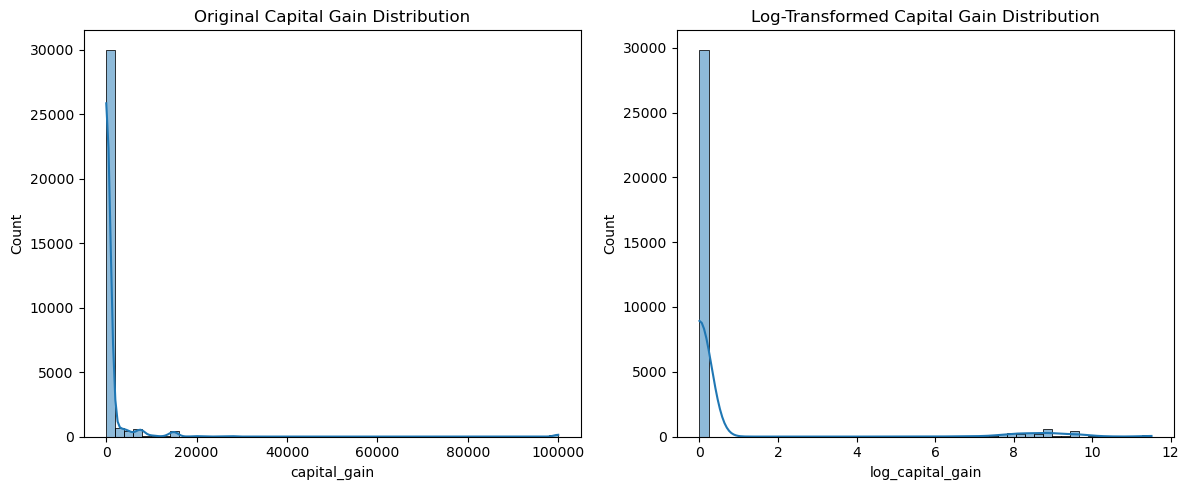

In [19]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the original and transformed 'capital_gain'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['capital_gain'], bins=50, kde=True)
plt.title('Original Capital Gain Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['log_capital_gain'], bins=50, kde=True)
plt.title('Log-Transformed Capital Gain Distribution')

plt.tight_layout()
plt.show()

# Justification for the Choice:

1. Skewness Reduction: Log transformation is effective at reducing skewness in distributions where values are unevenly distributed (a few very large values and many small values). This normalization helps models learn more effectively and reduces the influence of outliers.
2. Handling Zero Values: We use log1p to handle the zero values in capital_gain because applying a log transformation directly to zero would result in an undefined value.

# 4. Feature Selection:

# 4.1 Understanding Isolation Forest

In [20]:
# Import libraries
from sklearn.ensemble import IsolationForest

In [21]:
# Selecting numerical features for outlier detection
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Assuming 1% contamination (outliers)

# Fit the model and predict outliers (-1 indicates an outlier, 1 indicates an inlier)
outliers = iso_forest.fit_predict(data[numerical_features])

# Adding a column to mark outliers
data['outlier'] = outliers

# Display the number of outliers detected
print(f"Number of outliers detected: {(data['outlier'] == -1).sum()}")

# Display the first few rows of the dataset with outlier labels
data[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'outlier']].head()

Number of outliers detected: 326


age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   outlier  
0        1  
1        1  
2        1  
3        1  
4        1

In [22]:
# Removing the outliers (keeping only rows where 'outlier' is 1)
cleaned_data = data[data['outlier'] == 1].drop(columns=['outlier'])

# Display the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {cleaned_data.shape}")

Original dataset shape: (32561, 19)
Cleaned dataset shape: (32235, 18)


# Discuss How Outliers Affect Model Performance

How Outliers Impact Machine Learning Models:

1. Skew the Model: Outliers can disproportionately influence models, especially those that rely on distance-based metrics like linear regression, KNN, and SVM. A few extreme values can heavily influence model parameters, leading to inaccurate predictions.
2. Increase Error in Predictions: Outliers can increase the Mean Squared Error (MSE) or other error metrics during training, leading to poor generalization on unseen data. Models may overfit the outliers rather than learning the overall trend in the data.
3. Distort Feature Relationships: Outliers can mask or distort the true relationships between features and the target variable, making it difficult for models to learn meaningful patterns.

Why Isolation Forest Helps:
1. Efficient Anomaly Detection: Isolation Forest is a powerful algorithm for detecting outliers because it isolates anomalies rather than modeling normal data points. It is particularly effective in high-dimensional datasets.
2. Improved Model Performance: By removing outliers, the model can focus on learning patterns from the majority of data, leading to more accurate and generalizable predictions.

# 4.2 Apply the PPS (Predictive Power Score) and Compare it with the Correlation Matrix

In [23]:
# Install and Import the Required Library for PPS
!pip install ppscore

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13201 sha256=87a41fa2ced4d014d61cef7e16bda445986510aed84d1ea6b3a8fa1960de5367
  Stored in directory: c:\users\salman sayyed\appdata\local\pip\cache\wheels\7e\45\08\bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore


In [24]:
# Importing the necessary libraries
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

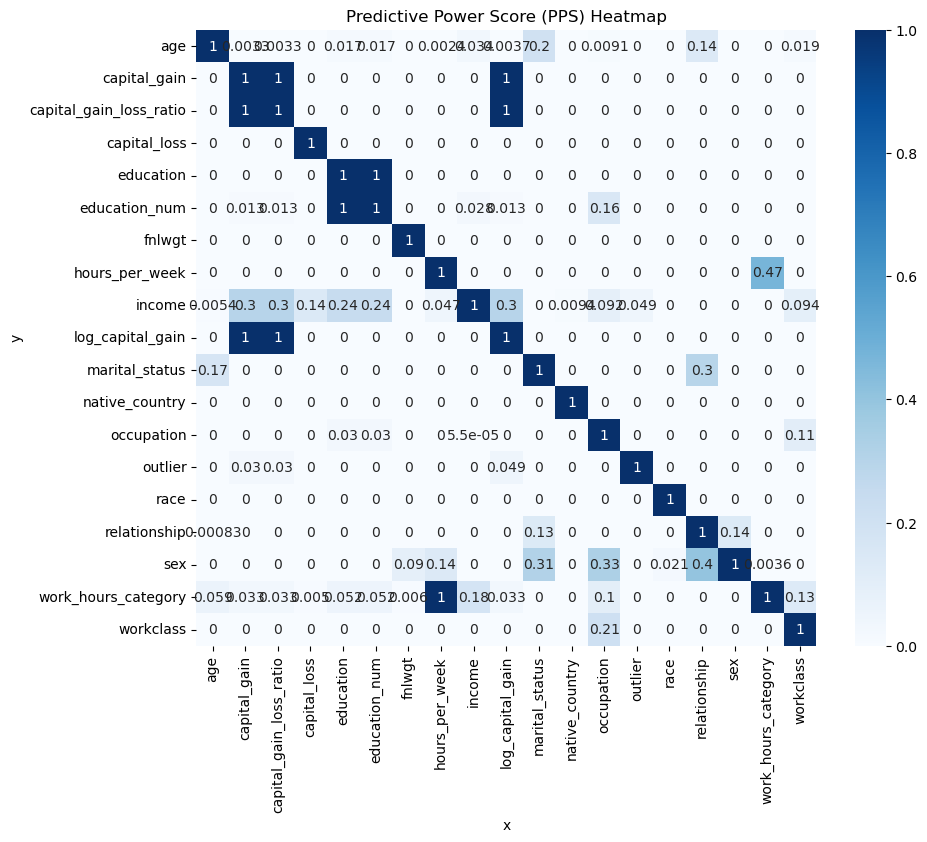

In [25]:
# Calculate the PPS matrix
pps_matrix = pps.matrix(data)

# Display the PPS matrix, focusing on feature-to-feature relationships
pps_matrix_filtered = pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Display the PPS matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_filtered, annot=True, cmap="Blues", cbar=True)
plt.title("Predictive Power Score (PPS) Heatmap")
plt.show()

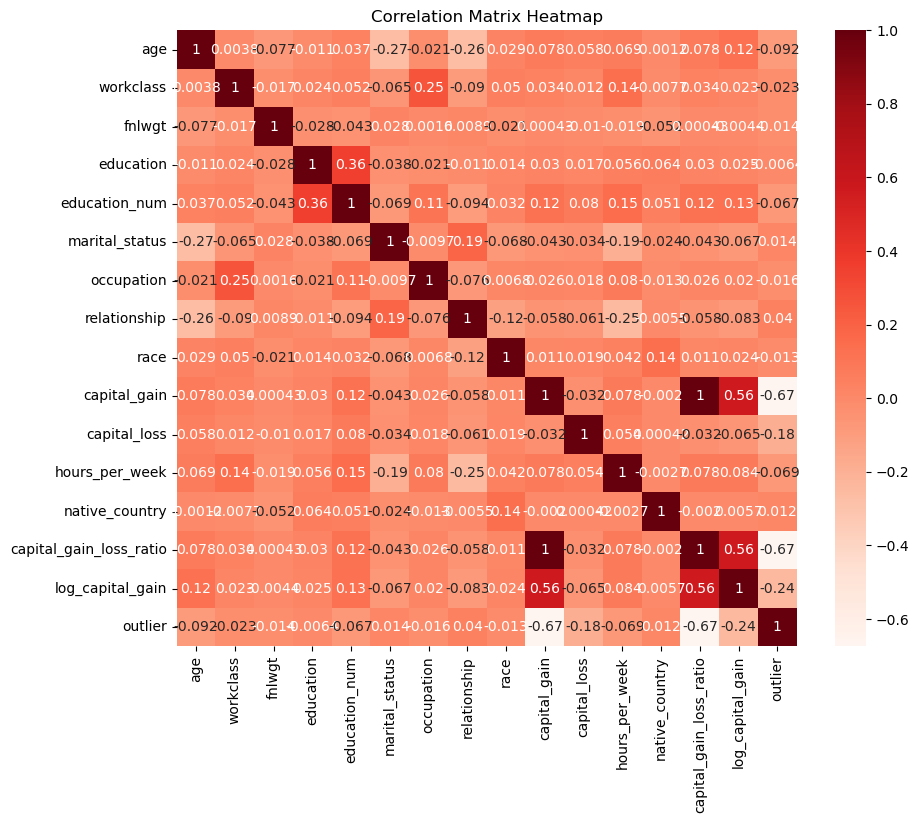

In [27]:
# Calculate the correlation matrix for numeric features only
correlation_matrix = data.corr(numeric_only=True)

# Display the correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Compare PPS with the Correlation Matrix

PPS vs Correlation Matrix:

PPS:
1. Captures Non-linear Relationships: Unlike correlation, PPS can capture both linear and non-linear relationships, which makes it more flexible in assessing feature importance.
2. Works with Categorical and Numerical Features: PPS can handle both categorical and numerical data, making it a more general tool for feature relationship analysis.
3. Asymmetry: PPS is directional, meaning feature A predicting feature B may have a different score than feature B predicting feature A. This helps better understand feature interactions.

Correlation Matrix:
1. Linear Relationships Only: Correlation is limited to detecting linear relationships between numerical features. Non-linear patterns will not be captured.
2. Symmetry: Correlation is symmetric, meaning the relationship between feature A and feature B is the same as the relationship between feature B and feature A.
3. Numeric Data Only: Correlation works only with numerical data, making it less versatile for datasets containing categorical features.

<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>